<a href="https://colab.research.google.com/github/jassriver/ufal_machine_learning/blob/master/Atividade_da_Semana_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação de spam de e-mail**

**O dataset utilizado pega as palavras mais comuns em spam e conta a quantidade de vezes que cada palavra é utilizada no e-mail, fazendo assim a classificação se o email é um spam, ou não.**

Neste dataset a classificação se dá pela coluna "prediction", **1 para Spam e 0 para não spam**

Link do Dataset: [Email Spam Classification Dataset CSV](https://www.kaggle.com/balaka18/email-spam-classification-dataset-csv)

In [1]:
# Monta o ambiente no drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importa as libs necessarias
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Lendo o dataset e armazenando em variavel ("dataframe", chamaremos de dados)
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/semana_2/datasets/emails.csv')
dados.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [4]:
# Limpa os dados faltantes
dados = dados.dropna()

In [5]:
# Excluindo colunas irrelevantes
dados = dados.drop(columns=['Email No.'])
dados.head()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,15,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


**Re-escalando os dados usando mínimo a máximo**

In [6]:
dados = (dados - dados.min()) / (dados.max() - dados.min())

# **Organizando os dados para a modelagem**

In [7]:
# dividindo dados em atributos descritores (Todas as colunas menos a 3001) e atributo de classe (somente a coluna 3001, ou seja "-1", a ultima)
# Reduzi o numero de atributos descritores para apenas 300
x = dados.iloc[:, 2700:-1]
x.head()

,recommended,royalty,amended,default,living,regardless,human,bringing,focused,stores,variety,netherlands,leaders,bowen,salary,signed,penny,loan,desktop,chase,pleasure,compare,session,overall,stranger,length,planned,sp,darrel,raise,palestinian,expiration,serial,premiere,suzanne,reduced,players,applicable,impotence,buckley,...,direction,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008772,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008772,0.0


In [8]:
# Salva uma referencia para os resultados da classificacao
y = dados.Prediction
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Prediction, dtype: float64

**Dividir os dados em treino e teste**

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [11]:
x_train.head()

,recommended,royalty,amended,default,living,regardless,human,bringing,focused,stores,variety,netherlands,leaders,bowen,salary,signed,penny,loan,desktop,chase,pleasure,compare,session,overall,stranger,length,planned,sp,darrel,raise,palestinian,expiration,serial,premiere,suzanne,reduced,players,applicable,impotence,buckley,...,direction,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
5027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008772,0.0


In [12]:
y_train.head()

5027    1.0
4999    0.0
1786    0.0
3072    0.0
3101    0.0
Name: Prediction, dtype: float64

# **Definindo o algoritmo de aprendizado**

In [13]:
from sklearn.neural_network import MLPClassifier

In [14]:
# Definindo o modelo
classificador = MLPClassifier(hidden_layer_sizes=(300), activation='logistic', max_iter=1000)

In [15]:
# Treinando o modelo
classificador.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=300, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [16]:
# Raliza a classificação
classificacao = classificador.predict(x_test)
classificacao

array([0., 0., 0., ..., 0., 1., 0.])

In [17]:
# Calculando Acuracia
from sklearn.metrics import accuracy_score

In [18]:
acuracia = accuracy_score(y_test, classificacao)
acuracia

0.8463768115942029

In [19]:
# Calculando precisao
from sklearn.metrics import precision_score

In [20]:
precisao = precision_score(y_test, classificacao)
precisao

0.7935779816513762

In [21]:
# Calculando o Recall
from sklearn.metrics import recall_score

In [22]:
recall = recall_score(y_test, classificacao)
recall

0.6027874564459931

In [23]:
# Calculando o F1-Score
from sklearn.metrics import f1_score

In [24]:
f1 = f1_score(y_test, classificacao)
f1

0.6851485148514851

## **Modelando com GridSearch**

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = [
              {
                  'hidden_layer_sizes': [(10),(50),(100)],
                  'activation': ['identity', 'logistic', 'tanh', 'relu'],
                  'solver': ['adam'],
                  'max_iter': [1000]
              }
              
]

In [27]:
classificadorGrid = GridSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')

In [28]:
classificadorGrid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [29]:
print(classificadorGrid.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 100, 'max_iter': 1000, 'solver': 'adam'}


In [30]:
print(classificadorGrid.best_score_)

0.8375611166605331


In [33]:
mlp = classificadorGrid.best_estimator_

In [34]:
classificaoGrid = mlp.predict(x_test)

In [35]:
acuraciaGrid = accuracy_score(y_test, classificaoGrid)
acuraciaGrid

0.863768115942029

In [36]:
precisaoGrid = precision_score(y_test, classificaoGrid)
precisaoGrid

0.8016528925619835

In [38]:
recallGrid = recall_score(y_test, classificaoGrid)
recallGrid

0.6759581881533101

In [41]:
# Importa as libs de metricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve

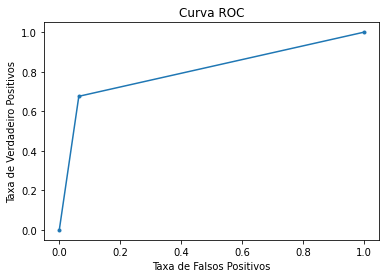

In [42]:
# Plota a Curva ROC
fpr, tpr, _ = roc_curve(y_test, classificaoGrid)
plt.plot(fpr, tpr, marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

# **Interpretação dos Resultados**

Utilizando os parâmetros calculados pelo GridSearch é possível obter um resultado melhor na acurácia, precisão e Recall do que parâmetros escolhidos aleatoriamente no MPLClassifier como testamos no primeiro exemplo.


*   Primeira Acurácia: **0.8463768115942029**
*   Acurácia com os Parâmetros optimizados do GridSearch: **0.863768115942029**

Logo é a melhor opção utilizar o GridSearch para obter os pares de parâmetros com a melhor configuração possível para obter os melhores resultados.

